In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pickle

In [3]:
df=pd.read_csv(r'car data.csv')

In [4]:
df.head()

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0

In [5]:
df.isnull().any()

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Kms_Driven       False
Fuel_Type        False
Seller_Type      False
Transmission     False
Owner            False
dtype: bool

In [6]:
df['current_year']=2020

In [7]:
df.head()

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  current_year  
0      Dealer       Manual      0          2020  
1      Dealer       Manual      0          2020  
2      Dealer       Manual      0          2020  
3      Dealer       Manual      0          2020  
4      Dealer       Manual      0          2020

In [8]:
df['no_of_years']=df['current_year']-df['Year']

In [9]:
df.head()

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  current_year  no_of_years  
0      Dealer       Manual      0          2020            6  
1      Dealer       Manual      0          2020            7  
2      Dealer       Manual      0          2020            3  
3      Dealer       Manual      0          2020            9  
4      Dealer       Manual      0          2020            6

In [10]:
df.drop(['Car_Name','Year','current_year'],axis=1,inplace=True)

In [11]:
df.head()

Selling_Price  Present_Price  Kms_Driven Fuel_Type Seller_Type  \
0           3.35           5.59       27000    Petrol      Dealer   
1           4.75           9.54       43000    Diesel      Dealer   
2           7.25           9.85        6900    Petrol      Dealer   
3           2.85           4.15        5200    Petrol      Dealer   
4           4.60           6.87       42450    Diesel      Dealer   

  Transmission  Owner  no_of_years  
0       Manual      0            6  
1       Manual      0            7  
2       Manual      0            3  
3       Manual      0            9  
4       Manual      0            6

In [12]:
df['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [13]:
df['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [14]:
df['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [15]:
dff=pd.get_dummies(df,drop_first=True)

In [16]:
dff.head()

Selling_Price  Present_Price  Kms_Driven  Owner  no_of_years  \
0           3.35           5.59       27000      0            6   
1           4.75           9.54       43000      0            7   
2           7.25           9.85        6900      0            3   
3           2.85           4.15        5200      0            9   
4           4.60           6.87       42450      0            6   

   Fuel_Type_Diesel  Fuel_Type_Petrol  Seller_Type_Individual  \
0                 0                 1                       0   
1                 1                 0                       0   
2                 0                 1                       0   
3                 0                 1                       0   
4                 1                 0                       0   

   Transmission_Manual  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1

In [17]:
dff.corr()

Selling_Price  Present_Price  Kms_Driven     Owner  \
Selling_Price                1.000000       0.878983    0.029187 -0.088344   
Present_Price                0.878983       1.000000    0.203647  0.008057   
Kms_Driven                   0.029187       0.203647    1.000000  0.089216   
Owner                       -0.088344       0.008057    0.089216  1.000000   
no_of_years                 -0.236141       0.047584    0.524342  0.182104   
Fuel_Type_Diesel             0.552339       0.473306    0.172515 -0.053469   
Fuel_Type_Petrol            -0.540571      -0.465244   -0.172874  0.055687   
Seller_Type_Individual      -0.550724      -0.512030   -0.101419  0.124269   
Transmission_Manual         -0.367128      -0.348715   -0.162510 -0.050316   

                        no_of_years  Fuel_Type_Diesel  Fuel_Type_Petrol  \
Selling_Price             -0.236141          0.552339         -0.540571   
Present_Price              0.047584          0.473306         -0.465244   
Kms_Driven                 0.524342          0.172515         -0.172874   
Owner                      0.182104         -0.053469          0.055687   
no_of_years                1.000000         -0.064315          0.059959   
Fuel_Type_Diesel          -0.064315          1.000000         -0.979648   
Fuel_Type_Petrol           0.059959         -0.979648          1.000000   
Seller_Type_Individual     0.039896         -0.350467          0.358321   
Transmission_Manual       -0.000394         -0.098643          0.091013   

                        Seller_Type_Individual  Transmission_Manual  
Selling_Price                        -0.550724            -0.367128  
Present_Price                        -0.512030            -0.348715  
Kms_Driven                           -0.101419            -0.162510  
Owner                                 0.124269            -0.050316  
no_of_years                           0.039896            -0.000394  
Fuel_Type_Diesel                     -0.350467            -0.098643  
Fuel_Type_Petrol                      0.358321             0.091013  
Seller_Type_Individual                1.000000             0.063240  
Transmission_Manual                   0.063240             1.000000

<AxesSubplot:>

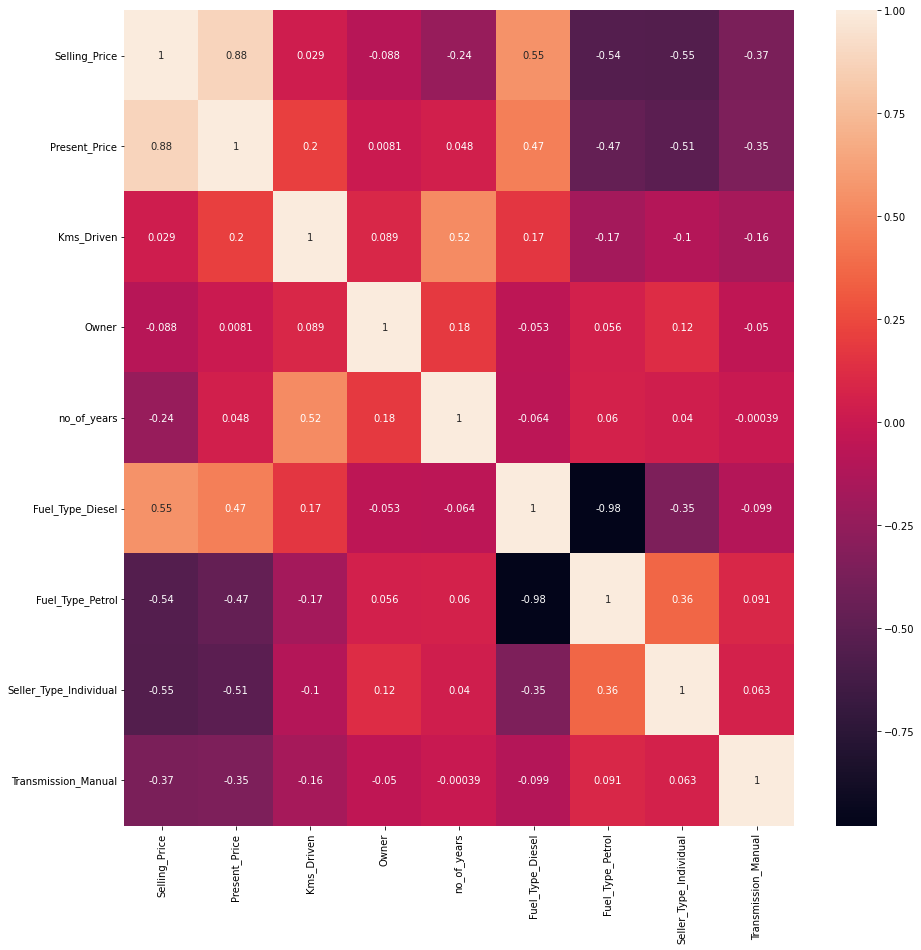

In [18]:
plt.figure(figsize=(15,15))
sns.heatmap(dff.corr(),annot=True)

In [19]:
dff.head()

Selling_Price  Present_Price  Kms_Driven  Owner  no_of_years  \
0           3.35           5.59       27000      0            6   
1           4.75           9.54       43000      0            7   
2           7.25           9.85        6900      0            3   
3           2.85           4.15        5200      0            9   
4           4.60           6.87       42450      0            6   

   Fuel_Type_Diesel  Fuel_Type_Petrol  Seller_Type_Individual  \
0                 0                 1                       0   
1                 1                 0                       0   
2                 0                 1                       0   
3                 0                 1                       0   
4                 1                 0                       0   

   Transmission_Manual  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1

In [20]:
from sklearn.feature_selection import mutual_info_regression

In [21]:
mutual_info=mutual_info_regression(dff.drop('Selling_Price',axis=1).values,dff.loc[:,'Selling_Price'].values)

In [22]:
mutual_info

array([1.29620932, 0.16428944, 0.02442293, 0.25798321, 0.15073173,
       0.13649126, 0.53937664, 0.08886274])

In [23]:
mutual_data=pd.Series(mutual_info,index=dff.drop('Selling_Price',axis=1).columns)

In [24]:
mutual_data.sort_values(ascending=False)

Present_Price             1.296209
Seller_Type_Individual    0.539377
no_of_years               0.257983
Kms_Driven                0.164289
Fuel_Type_Diesel          0.150732
Fuel_Type_Petrol          0.136491
Transmission_Manual       0.088863
Owner                     0.024423
dtype: float64

In [25]:
x=dff.drop('Selling_Price',axis=1).values

In [26]:
y=dff.loc[:,'Selling_Price'].values

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [28]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [29]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [30]:
n_estimators=[int(x) for x in np.linspace(100,2000,100)]
max_features=['auto','sqrt','log2']
max_depth=[int(x) for x in np.linspace(10,1000,10)]
min_samples_split=[2,5,10,14]
min_samples_leaf=[1,2,4,6,8]

In [31]:
random_grid={'n_estimators':n_estimators,
            'max_features':max_features,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf,
            'criterion':['mse','mae']}

In [32]:
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=10,cv=3,verbose=2,random_state=100,n_jobs=-1)

In [33]:
rf_randomcv.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [100, 119, 138, 157,
                                                         176, 195, 215, 234,
                                                         253, 272, 291, 311,
                                                         330, 349, 368, 387,
                                              

In [34]:
rf_randomcv.best_params_

{'n_estimators': 1788,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 1000,
 'criterion': 'mse'}

In [35]:
rff=RandomForestRegressor(n_estimators=1788,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',max_depth=1000,criterion='mse')

In [36]:
rff.fit(x_train,y_train)

RandomForestRegressor(max_depth=1000, max_features='sqrt', n_estimators=1788)

In [37]:
pred=rff.predict(x_test)

c:\users\krishna\anaconda3\envs\carsproject\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

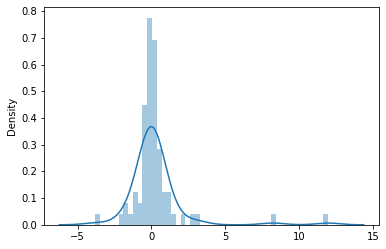

In [38]:
sns.distplot(y_test-pred)

In [39]:
from sklearn.metrics import *

In [40]:
accuracy=r2_score(y_test,pred)

In [41]:
print(accuracy)

0.8851509519229592


In [42]:
predt=rff.predict(x_train)

In [43]:
accuracyt=r2_score(y_train,predt)
print(accuracyt)

0.977375628661028


In [45]:
import pickle

In [46]:
file=open("carsmodel1.pkl",'wb')

In [47]:
pickle.dump(rff,file)